In [20]:
from systemclass import SNAIL,SNAIL_sweep
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

In [182]:
import qutip as qt
def floquet_spec(Hs,Hc, omega, A):
#     Hs[0][0] = Hs[0][0]+Hs[1][1]
#     Hs[1][1] = Hs[1][1]+Hs[1][1]
    Hs = Qobj(Hs)
    Hc = Qobj(charge_op)
    args = {'w': omega}
    T = (2*np.pi)/omega
    H = [Hs,  [Hc, lambda t, args: A*np.cos(args['w']*t)]] 
    options = Options(nsteps=100000)  # Increasing nsteps to 10000, adjust as needed
    f_modes, f_energies = floquet_modes(H, T, args, True, options=options) 
    print(f_modes)
    return f_energies

In [318]:
EJ = 90*2*np.pi
EC = 0.177*2*np.pi
beta = 0.22
ng = 0
ncut = 300
N = 3
dims = 6

In [354]:
flux_values = np.linspace(0.35, 0.4, 100)
Hss = []
charge_ops = []
for flux in flux_values:
    snail =  SNAIL(EJ,EC,beta,ng,ncut,flux,N,dims)
    Hs , charge_op = snail.spectrum_charge()
    Hss.append(Hs)
    charge_ops.append(charge_op)

In [365]:
omega = 6*2*np.pi
A = 0.03*2*np.pi
floquet_results = []
for i in range(len(flux_values)):
    if 0.38<flux_values[i]<0.4:
        print(flux_values[i])
        floquet_results.append(floquet_spec(Hss[i],charge_ops[i], omega, A))

0.3803030303030303
[Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[ 9.21674340e-01+0.00000000e+00j]
 [ 2.86573418e-01-2.56036960e-01j]
 [ 5.84342239e-03-5.27897293e-02j]
 [-2.13123090e-03-3.41509497e-03j]
 [-2.10222087e-04-1.06486302e-04j]
 [-1.52467876e-05+2.02384817e-06j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[-2.89057095e-01-2.58107240e-01j]
 [ 9.05360286e-01+0.00000000e+00j]
 [ 1.27489509e-01-1.16944589e-01j]
 [ 2.04309551e-03-1.46569752e-02j]
 [-3.58054382e-04-8.10286057e-04j]
 [-4.57643402e-05-3.13018960e-05j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[ 1.31978701e-03+0.01846868j]
 [-1.33200261e-01-0.1216958j ]
 [ 9.74100785e-01+0.j        ]
 [ 9.84933656e-02-0.09190912j]
 [ 1.87773134e-03-0.00897651j]
 [-1.62073006e-04-0.00053884j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[ 3.43651192e-04-0.00032854j]
 [-1.71799069e-04+0.00954834j]
 [-9.92032

[Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[ 9.97725206e-01+0.00000000e+00j]
 [ 5.02290490e-02-4.48762399e-02j]
 [ 8.66162482e-04-2.60975782e-03j]
 [-1.36285110e-05-1.32591432e-04j]
 [-5.71515588e-06-5.35352151e-06j]
 [-1.00783501e-06+3.65324852e-07j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[-5.02747886e-02-4.48610180e-02j]
 [ 9.95314537e-01+0.00000000e+00j]
 [ 5.10912321e-02-4.68039577e-02j]
 [ 1.23007464e-03-2.53750311e-03j]
 [-1.62739921e-05-1.76486479e-04j]
 [-8.29537321e-06-6.58402770e-06j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[-3.94816828e-04+0.00204564j]
 [-5.11955410e-02-0.0467476j ]
 [ 9.95180711e-01+0.j        ]
 [ 5.06441488e-02-0.04723554j]
 [ 1.57099749e-03-0.00247884j]
 [-2.91900887e-05-0.00022335j]], Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[ 7.83870751e-05-3.45836223e-05j]
 [-8.44714256e-04+2.25488552e-03j]
 [-5.07794278e-02-4.7

In [359]:
floquet_results = np.array(floquet_results)

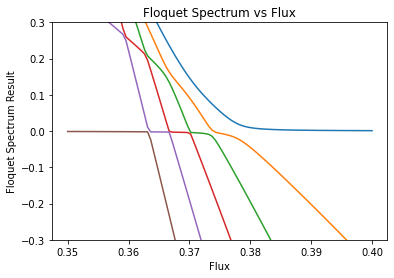

In [361]:
# Plotting
plt.plot(flux_values, np.array(floquet_results/2/np.pi), )
plt.xlabel('Flux')
plt.ylabel('Floquet Spectrum Result')
plt.title('Floquet Spectrum vs Flux')
# plt.xlim(0.30,0.4)
plt.ylim(-0.3,0.3)
# plt.ylim(-2.3,2.3)
plt.show()

In [334]:
flux_values = np.linspace(0.3, 0.5, 100)
snail_sweep = SNAIL_sweep(snail,flux_values)

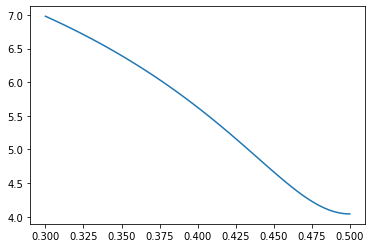

In [335]:
plt.plot(snail_sweep.fluxs, np.array(snail_sweep.omegass)/2/np.pi )

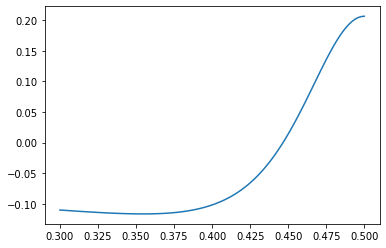

In [336]:
plt.plot(snail_sweep.fluxs, np.array(snail_sweep.anhs)/2/np.pi )

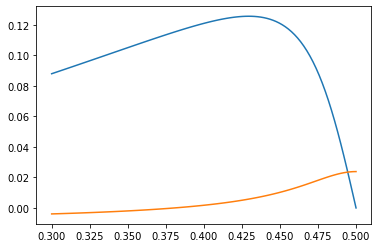

In [337]:
plt.plot(snail_sweep.fluxs, np.array(snail_sweep.g3s)/2/np.pi )
plt.plot(snail_sweep.fluxs, np.array(snail_sweep.g4s)/2/np.pi )